# Find faces in pictures
We start by loading an example picture using Python imaging library. Go ahead and **run the cell bellow** to see the image.

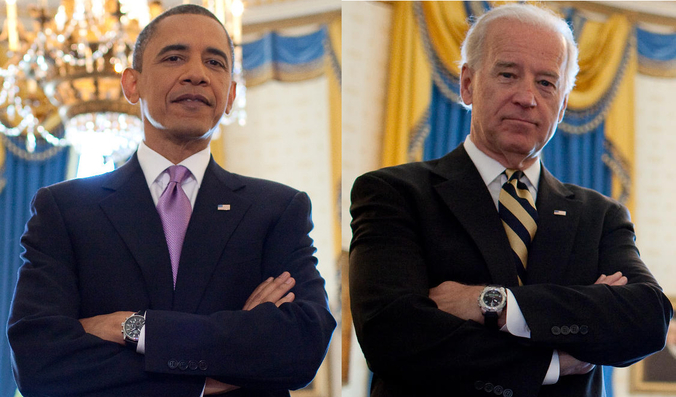

In [1]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('two_people.jpg')
display(pil_im)

# Learning from example
Now we show the library two different faces ([Joe Biden](/biden.jpg), [Barack Obama](/obama.jpg)) and generate the encodings for them. Encoding is simply a low dimensional representation of a face that can be easily compared with other faces the library will recognize in the future.

In [2]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.


# Showtime
Finally, we load the image we looked at in the first cell, find the faces in the image and compare them with the encodings the library generated in the previous step. We can see that library now correctly recognizes Barack and Joe in the input.

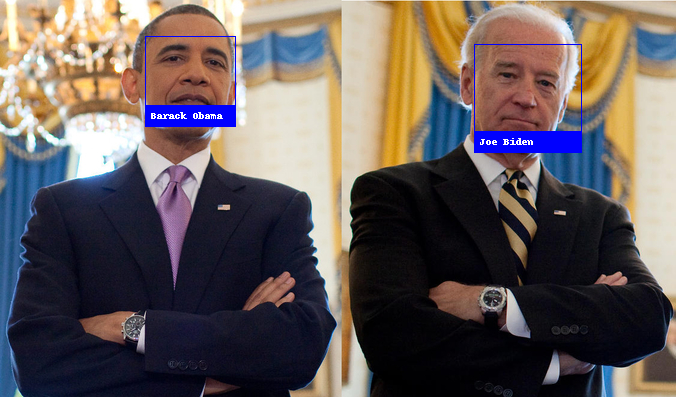

In [3]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("two_people.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(82, 160), (86, 186), (91, 212), (96, 237), (107, 259), (126, 275), (149, 288), (172, 297), (195, 298), (216, 293), (232, 277), (246, 260), (257, 241), (262, 220), (266, 199), (267, 179), (267, 158)]
The left_eyebrow in this face has the following points: [(118, 147), (132, 138), (148, 132), (167, 130), (183, 134)]
The right_eyebrow in this face has the following points: [(214, 134), (227, 129), (241, 129), (254, 135), (260, 147)]
The nose_bridge in this face has the following points: [(198, 154), (200, 168), (201, 183), (203, 198)]
The nose_tip in this face has the following points: [(178, 208), (188, 211), (199, 214), (209, 211), (218, 208)]
The left_eye in this face has the following points: [(139, 160), (150, 155), (161, 154), (171, 160), (161, 161), (150, 161)]
The right_eye in this face has the following points: [(215, 160), (224, 153), (235, 153), (244, 158), (235, 160), (225, 161)]
The top_li

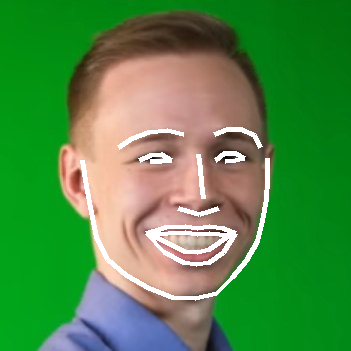

In [2]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
# image = face_recognition.load_image_file("two_people.jpg")
image = face_recognition.load_image_file("liquid1.jpg")


# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
pil_image.show()
display(pil_image)

Weird makup

ok??


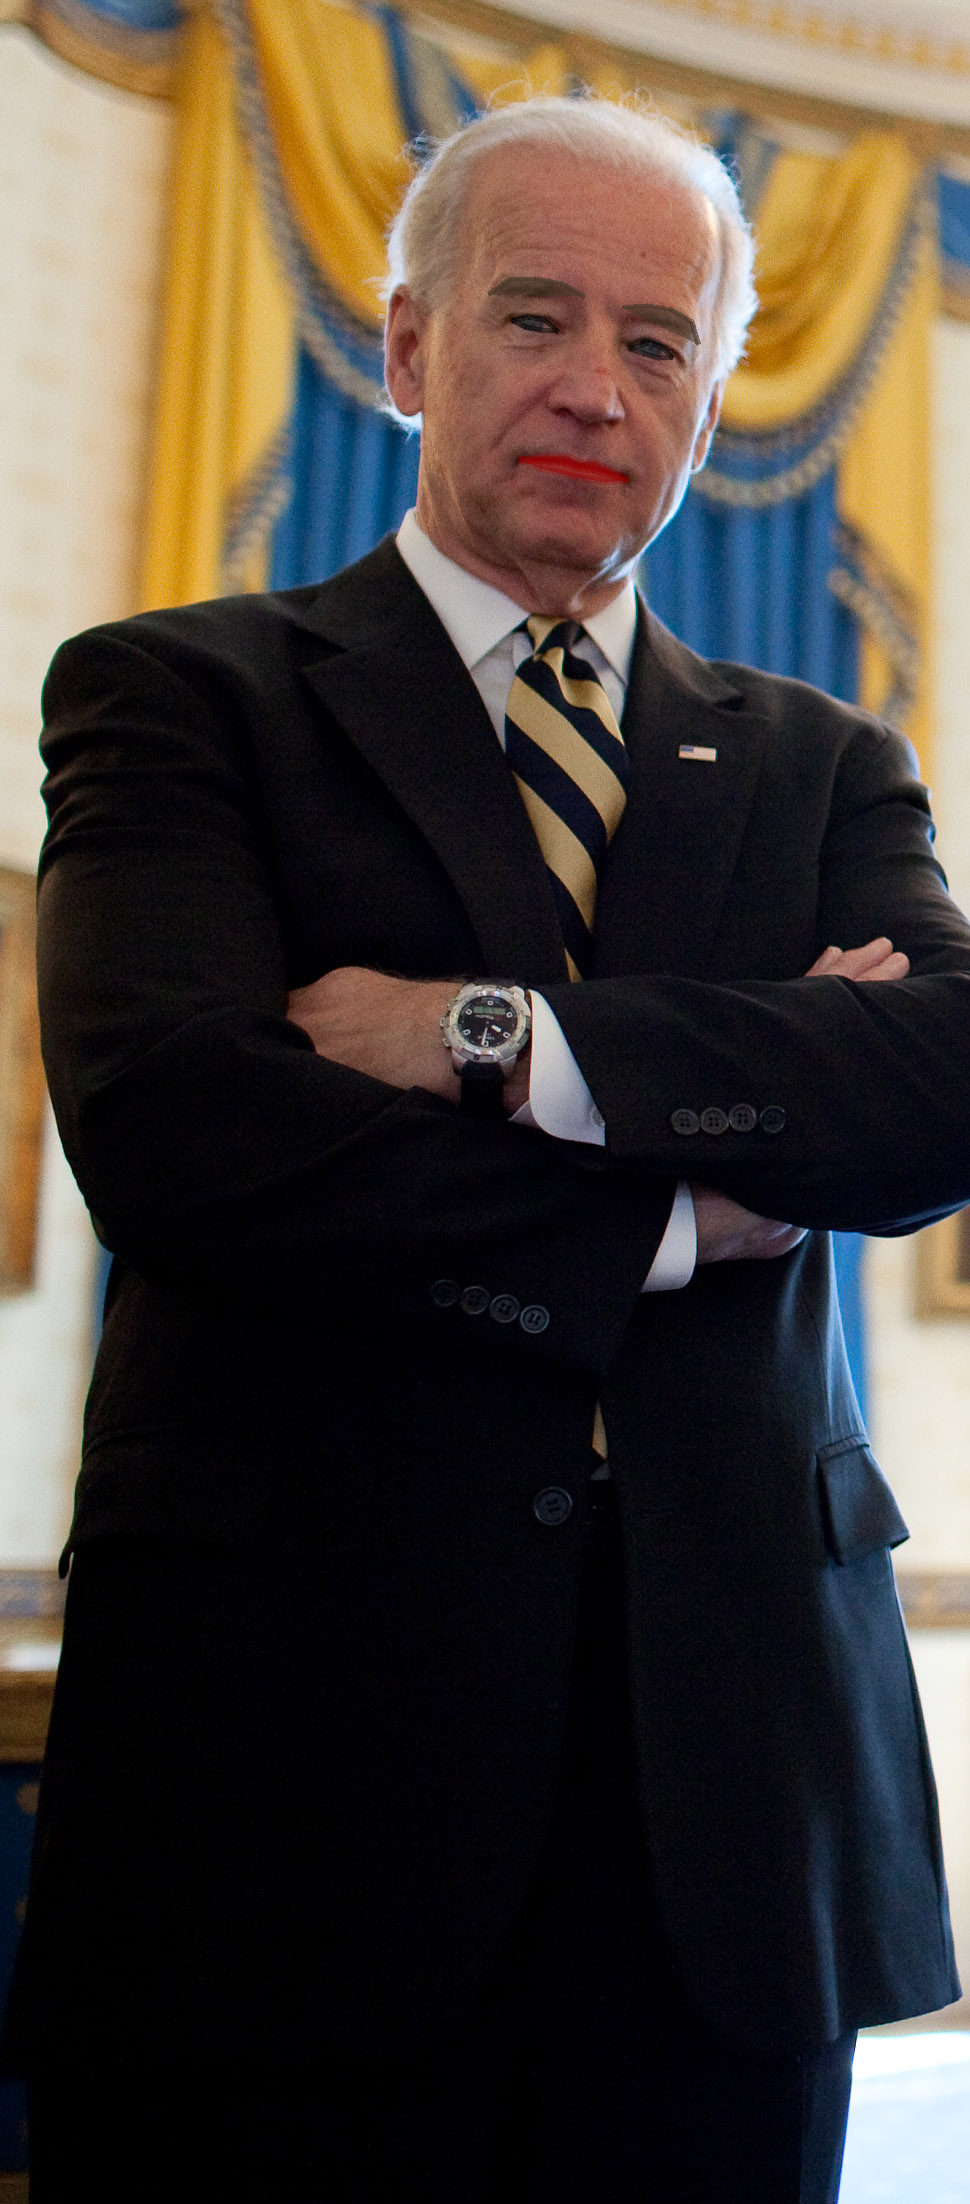

In [5]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("biden.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)
pil_image.show()

for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)
    print('ok??')

    pil_image.show()
    display(pil_image)

# Draw on headphones on heads


I found 8 face(s) in this photograph.
looking at face 0
	Feature keys:  dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])
	Feature keys WATNED:  ['chin']
	The chin in this face has the following points: [(838, 309), (838, 316), (838, 323), (841, 330), (844, 337), (847, 344), (849, 352), (852, 359), (859, 362), (867, 362), (877, 358), (884, 352), (891, 345), (896, 336), (897, 326), (897, 315), (897, 305)]
309
[(838, 309), (838, 316), (838, 323), (841, 330), (844, 337), (847, 344), (849, 352), (852, 359), (859, 362), (867, 362), (877, 358), (884, 352), (891, 345), (896, 336), (897, 326), (897, 315), (897, 305)]
[(838, 309), (838, 302), (838, 295), (841, 288), (844, 281), (847, 274), (849, 266), (852, 259), (859, 256), (867, 256), (877, 260), (884, 266), (891, 273), (896, 282), (897, 292), (897, 303), (897, 313)]
looking at face 1
	Feature keys:  dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge

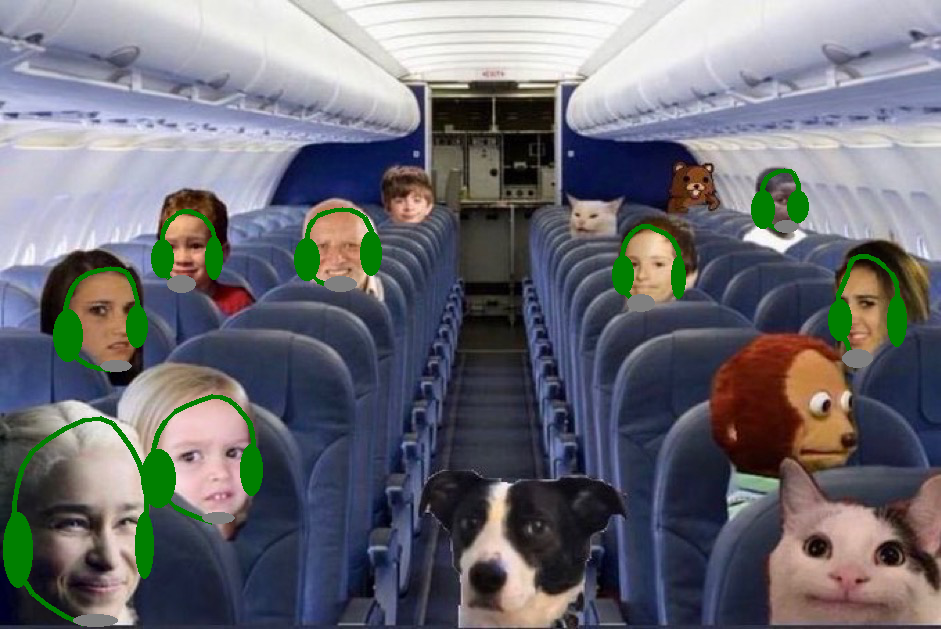

In [1]:
from PIL import Image, ImageDraw
import face_recognition
import math


def flip_facial_landmarks_horizontally(landmarks):
    # If landmarks are
    # [(474, 76), (473, 89), (473, 101)....]
    # We want to keep the X value, but flip the Y values
    # Meaning we look at the diff and flip based on first? at half way we need to swap to flipping from last value maybe? Idk
    # diffs: 0, 13, 25 then minus them from first val
    # [(474, 76), (473, 63), (473, 51)....]
    # I think that just means yFN = y0 - (yN - y0)

    # This is lazy, but get the lower side and base off that
    y0 = max(landmarks[0][1], landmarks[-1][1])
    print(y0)

    new_landmarks = []

    for landmark in landmarks:
        yN = landmark[1]
        yFN = y0 - (yN - y0)
        new_landmarks.append((landmark[0], yFN))
    
    return new_landmarks


# Load the jpg file into a numpy array
image = face_recognition.load_image_file("IMG_8302.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

# for face_landmarks in face_landmarks_list:
for i, face_landmarks in enumerate(face_landmarks_list):
    print('looking at face', i)

    keys_wanted = ['chin']
    print('\tFeature keys: ', face_landmarks.keys())
    print('\tFeature keys WATNED: ', keys_wanted)
    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        if facial_feature not in keys_wanted: 
            continue
        print("\tThe {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    
    # Draw chin line (debugging)
    # for facial_feature in face_landmarks.keys():
    #     if facial_feature not in keys_wanted: 
    #         continue
    #     d.line(face_landmarks[facial_feature], width=5, fill="red")

    # Flip and draw chin line
    for facial_feature in face_landmarks.keys():
        if facial_feature not in keys_wanted: 
            continue
        flipped_landmarks = flip_facial_landmarks_horizontally(face_landmarks[facial_feature])
        print(face_landmarks[facial_feature])
        print(flipped_landmarks)
        # Overhead line
        d.line(flipped_landmarks, width=5, fill="green")

        # Mic line (just half, but not flipped)
        half_points = math.floor(len(face_landmarks[facial_feature]) / 2)
        d.line(face_landmarks[facial_feature][0:half_points], width=5, fill="green")

        # TODO
        # +/- 10/5 is an arbitrary number. Should be based on head size
        # Mic foam
        d.ellipse(
            [
                (face_landmarks[facial_feature][half_points-1][0]-10, face_landmarks[facial_feature][half_points-1][1]-10),
                (face_landmarks[facial_feature][half_points+1][0]+5, face_landmarks[facial_feature][half_points+1][1]+5)
            ], 
            fill='grey', 
            width=1
        )

        # TODO
        # +/- 10 is an arbitrary number. Should be based on head size

        # Left headphone 
        d.ellipse(
            [
                (face_landmarks[facial_feature][0][0]-10, face_landmarks[facial_feature][0][1]-10),
                (face_landmarks[facial_feature][3][0]+10, face_landmarks[facial_feature][3][1]+10)
            ], 
            fill='green', 
            width=3
        )

        # Right headphone - use last first, because in theory the previous values will be below
        d.ellipse(
            [
                (face_landmarks[facial_feature][-1][0]-10, face_landmarks[facial_feature][-1][1]-10),
                (face_landmarks[facial_feature][-4][0]+10, face_landmarks[facial_feature][-4][1]+10)
            ], 
            fill='green', 
            width=3
        )


# Show the picture
display(pil_image)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=98597126-2099-4fae-bb09-3e7698ef15ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>